Name: <b>ABUBAKAR Ibrahim</b><br />
Matic no: <b>M.eng/SIPET/2022/13711</b>

### Assignment
<i>Prediction and analysis of hydraulic conductivity/Compressive strength of Lateritic soil - Bentonite mixtures using support vector machine</i>	
<hr />



importing the modules to be used

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.optimizers import SGD

reading in the data

In [142]:
ucs = pd.read_excel("data/UCS AI DATA.xlsx")
ucs.columns = ucs.loc[1]
ucs = ucs.drop([0,1], axis = 0).reset_index(drop = True)
ucs.head(3)

1,Compactive Effort E,Moulding Water Content (%),Bentonite content (%),UCS (kN/m2)
0,RBSL,12.5,0,191.47
1,RBSL,15,0,184.55
2,RBSL,17.5,0,241.67


In [143]:
print(ucs.shape)

(100, 4)


In [144]:
ucs.columns

Index(['Compactive Effort E', 'Moulding Water Content (%)',
       'Bentonite content (%)', 'UCS (kN/m2)'],
      dtype='object', name=1)

In [145]:
ucs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Compactive Effort E         100 non-null    object
 1   Moulding Water Content (%)  100 non-null    object
 2   Bentonite content (%)       100 non-null    object
 3   UCS (kN/m2)                 100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [146]:
ucs['Moulding Water Content (%)'] = ucs['Moulding Water Content (%)'].astype(float)
ucs['Bentonite content (%)'] = ucs['Bentonite content (%)'].astype(float)
ucs['UCS (kN/m2)'] = ucs['UCS (kN/m2)'].astype(float)

In [147]:
ucs.describe()

1,Moulding Water Content (%),Bentonite content (%),UCS (kN/m2)
count,100.000000,100.000000,100.00000
mean,17.500000,5.000000,323.74030
std,3.553345,3.553345,273.36049
min,12.500000,0.000000,50.71000
25%,15.000000,2.500000,137.85750
50%,17.500000,5.000000,208.34000
75%,20.000000,7.500000,401.85500
max,22.500000,10.000000,1325.99000


Text(0.5, 1.0, 'histogram plot of UCS')

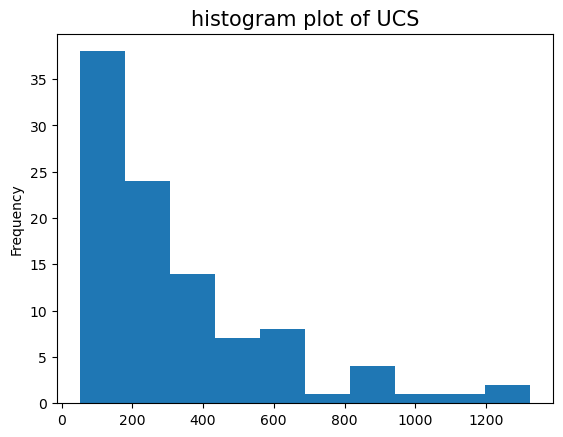

In [8]:
ucs['UCS (kN/m2)'].plot(kind = 'hist')
plt.title('histogram plot of UCS', fontsize = 15)

Text(0.5, 1.0, 'value counts of Bentonite content')

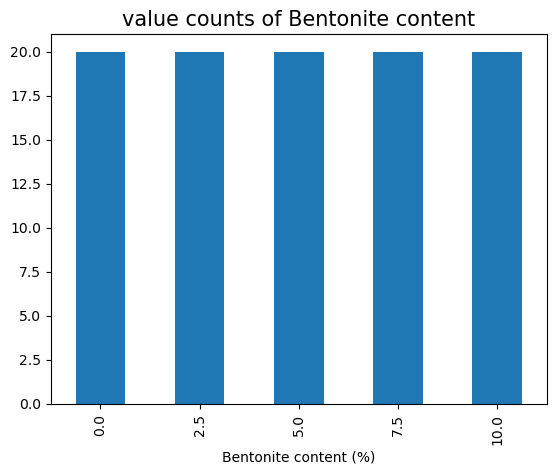

In [9]:
ucs['Bentonite content (%)'].value_counts().plot(kind = 'bar')
plt.title('value counts of Bentonite content', fontsize = 15)

Text(0.5, 1.0, 'value counts of Compactive effort')

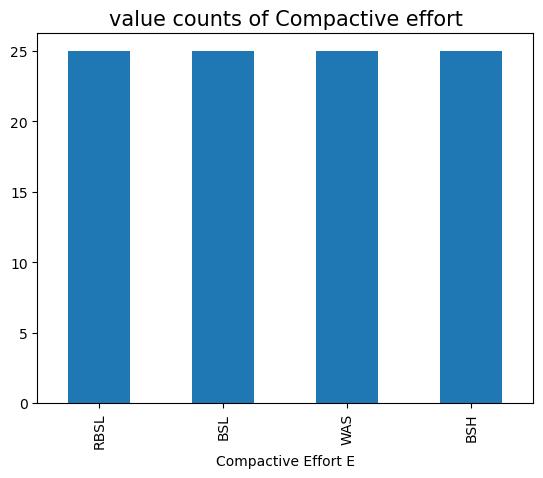

In [10]:
ucs['Compactive Effort E'].value_counts().plot(kind = 'bar')
plt.title('value counts of Compactive effort', fontsize = 15)

## Observations
<ul>
<li>the target class is the Unconfined Compressive Strength (m/s)</li>
<li>the target class is a float type number with most values between 0 and 200</li>
<li>there are 100 data points with four columns</li>
<li>there are no null value in the dataset</li>
<li>the datatype for all the columns are object which need to be converted to numeric data type</li>
<li>the comparative effort have four categories with 25 rows each</li>
<li>Bentonite content have values containing quarters of 1 (i.e. 0.25, 0.5, 0.75, and 1.0)</li>
</ul>

C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


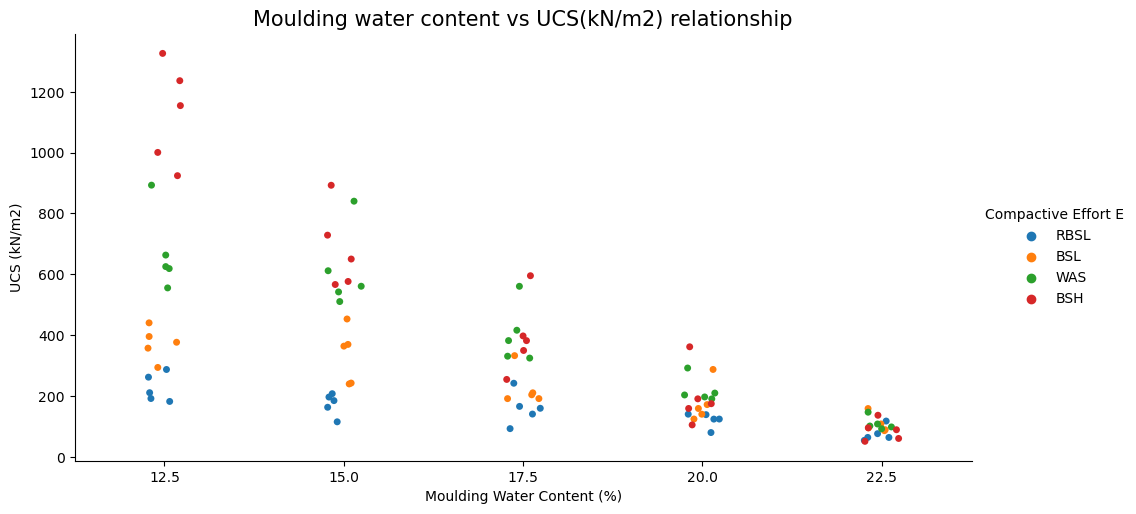

In [11]:
sns.catplot(x = 'Moulding Water Content (%)', y = 'UCS (kN/m2)', hue = 'Compactive Effort E', data = ucs, aspect = 2)
plt.xlabel('Moulding Water Content (%)')
plt.ylabel('UCS (kN/m2)')
plt.title('Moulding water content vs UCS(kN/m2) relationship', fontsize = 15)
plt.show()

C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


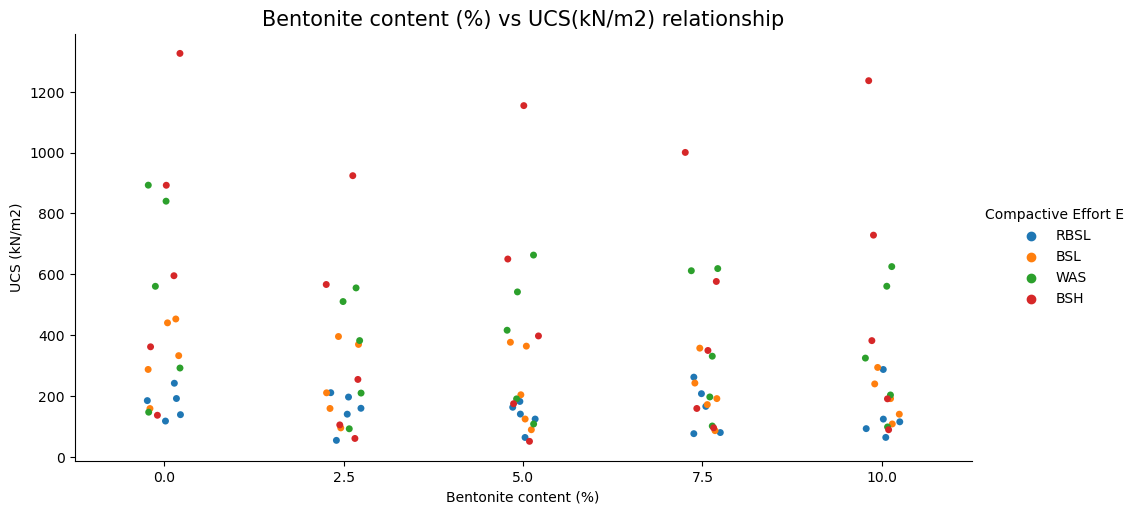

In [12]:
sns.catplot(x = 'Bentonite content (%)', y = 'UCS (kN/m2)', hue = 'Compactive Effort E', data = ucs, aspect = 2)
plt.xlabel('Bentonite content (%)')
plt.ylabel('UCS (kN/m2)')
plt.title('Bentonite content (%) vs UCS(kN/m2) relationship', fontsize = 15)
plt.show()

In [13]:
le = LabelEncoder()
ucs['Compactive Effort E'] = le.fit_transform(ucs['Compactive Effort E'])
for i, j in enumerate(le.classes_):
    print(f'{j} is encoded as {i}')

BSH is encoded as 0
BSL is encoded as 1
RBSL is encoded as 2
WAS is encoded as 3


In [148]:
sns.heatmap(ucs.corr().abs(), cmap = 'cool', annot = True)
plt.title('corrlation plot of the columns', fontsize = 20)
plt.show()

ValueError: could not convert string to float: 'RBSL'

In [15]:
y = ucs.pop('UCS (kN/m2)')
X = ucs

In [16]:
display(X.head(2))
print(y[:5])

1,Compactive Effort E,Moulding Water Content (%),Bentonite content (%)
0,2,12.5,0.0
1,2,15.0,0.0


0    191.47
1    184.55
2    241.67
3    138.34
4    117.37
Name: UCS (kN/m2), dtype: float64


splitting to 80% for training and 20% for testing while shuffling the data to ensure each class of compactive effort is distributed evenly

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

support vector regressor

In [20]:
X_train.shape

(80, 3)

In [113]:
# model = keras.models.Sequential([
#     keras.layers.Dense(32, input_shape=(3, ), activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(1, activation='linear')
# ])


model = keras.models.Sequential([
    keras.layers.Dense(32, input_shape=(3, ), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

In [114]:
import keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r_squared])


In [115]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 350, verbose = True)

Epoch 1/500
3/3 [==============================] - 1s 238ms/step - loss: 208163.0469 - r_squared: -1.9920 - val_loss: 49085.4883 - val_r_squared: -2.1273
Epoch 2/500
3/3 [==============================] - 0s 47ms/step - loss: 204507.7812 - r_squared: -1.6392 - val_loss: 46188.1797 - val_r_squared: -1.9427
Epoch 3/500
3/3 [==============================] - 0s 41ms/step - loss: 199118.9219 - r_squared: -1.5934 - val_loss: 42454.8945 - val_r_squared: -1.7049
Epoch 4/500
3/3 [==============================] - 0s 36ms/step - loss: 192806.0156 - r_squared: -1.4167 - val_loss: 37568.4297 - val_r_squared: -1.3936
Epoch 5/500
3/3 [==============================] - 0s 34ms/step - loss: 183286.0000 - r_squared: -1.2521 - val_loss: 31487.9727 - val_r_squared: -1.0062
Epoch 6/500
3/3 [==============================] - 0s 36ms/step - loss: 170416.7812 - r_squared: -1.1807 - val_loss: 24888.4688 - val_r_squared: -0.5857
Epoch 7/500
3/3 [==============================] - 0s 34ms/step - loss: 155300.31

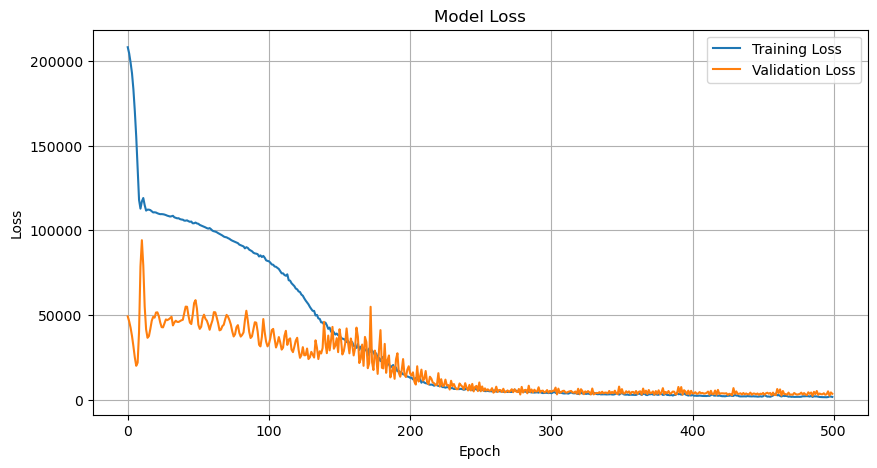

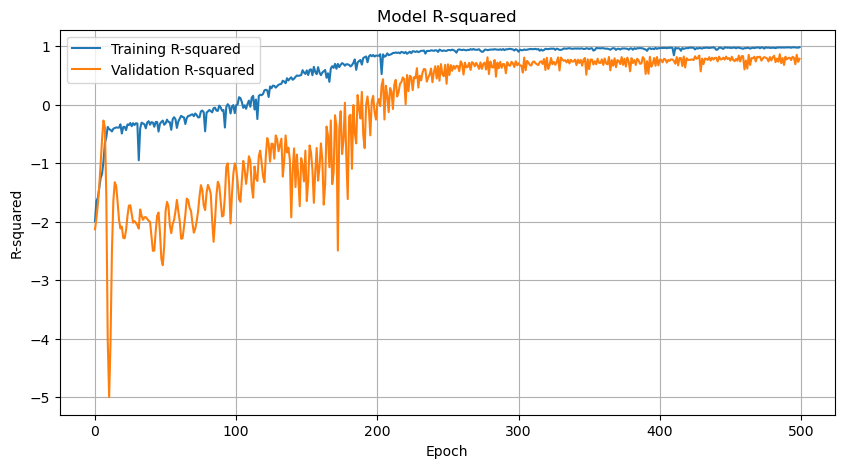

In [116]:
# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation R-squared
plt.figure(figsize=(10, 5))
plt.plot(history.history['r_squared'], label='Training R-squared')
plt.plot(history.history['val_r_squared'], label='Validation R-squared')
plt.title('Model R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.show()


In [117]:
prediction = model.predict(X_test)

1/1 [==============================] - 0s 173ms/step


In [122]:
prediction = prediction.reshape(-1,)

In [126]:
np.sqrt(mean_squared_error(prediction, y_test))

58.18455484636073

In [127]:
prediction

array([ 81.17027, 177.536  , 207.57933, 111.48931, 162.8767 ,  95.0358 ,
        98.54775, 701.9454 , 151.0901 , 394.98303, 367.06165, 104.74254,
       116.79135, 195.74205, 176.43329, 182.8414 , 199.69722,  77.83509,
       187.82558, 268.04718], dtype=float32)

In [129]:
a = pd.DataFrame([prediction, y_test]).T
a.columns = ['prediction', 'actual value']
a['difference'] = abs(a['actual value'] - a.prediction)
a

,prediction,actual value,difference
0,81.170273,53.88,27.290273
1,177.535995,191.17,13.634005
2,207.579330,190.42,17.159330
3,111.489311,95.13,16.359311
4,162.876694,191.10,28.223306
5,95.035797,94.91,0.125797
6,98.547752,107.67,9.122248
7,701.945374,576.25,125.695374
8,151.090103,159.37,8.279897
9,394.983032,349.37,45.613032


C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


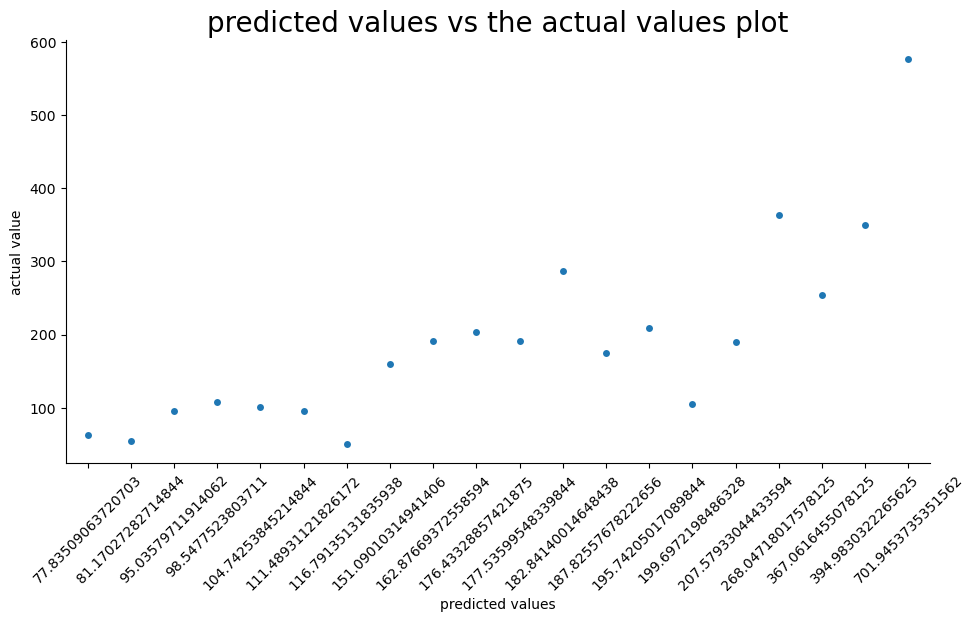

In [131]:
sns.catplot(x = 'prediction', y = "actual value", data = a, aspect =2)
plt.title('predicted values vs the actual values plot', fontsize = 20)
plt.xlabel('predicted values')
plt.ylabel('actual value')
plt.xticks(rotation = 45)
plt.show()

C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\tensorflow_library\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


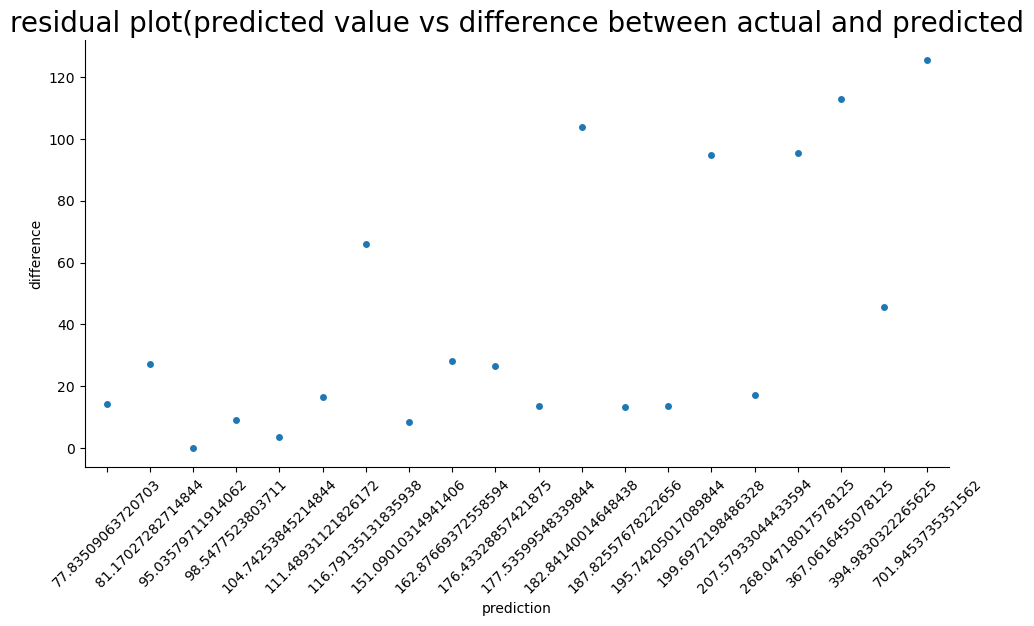

In [132]:
sns.catplot(x = 'prediction', y = "difference", data = a, aspect =2)
plt.xticks(rotation = 45)
plt.title('residual plot(predicted value vs difference between actual and predicted', fontsize = 20)
plt.show()

###### Conclusion
This study investigated the feasibility of using a Support Vector Machine (SVM) for predicting the Unconfined Compressive Strength (UCS) of Lateritic soil-Bentonite mixtures. The analysis revealed several key observations:
<ol>
<li>The target variable, UCS, is a continuous value ranging from 0 to 1400 (m/MPa), with most observations concentrated between 0 and 200 (m/MPa). This indicates a regression problem suitable for SVM application.</li>
<li>The dataset comprised 100 data points with four features, all initially in object format, requiring conversion to numerical data types for model training.</li>
<li>Interestingly, the "compactive effort" feature had four distinct categories with an equal number of data points in each, suggesting a potential influence on UCS.</li>
<li>Bentonite content exhibited a specific range with values representing quarters of 1 (0.25, 0.5, 0.75, and 1.0). This potentially allows for exploring the impact of varying Bentonite content on UCS.</li>
<li>While the model achieved a Root Mean Squared Error (RMSE) of 336, further optimization might be necessary to improve prediction accuracy, especially for values exceeding 200 (m/MPa).</li>
<li>The residual plot indicated a potential trend, suggesting a systematic error that could be addressed through model refinement or data transformation techniques.</li>
<li>The correlation coefficients between features and the target variable were generally low (around 20%). This suggests that non-linear relationships might exist between the features and UCS, potentially justifying the use of a non-linear model like SVM.y justifying the use of a non-linear model like SVM.</li>
<li>Moulding water content shows a high correlation with the hydraulic conductivity.</li>
</ol>